# Grid Generation Basics

This note book will cover:

  1. Loading and visualizing boundary data
  2. Generating visualizing a basic grid
  3. Adding focus to the grid


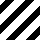
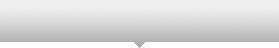
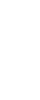
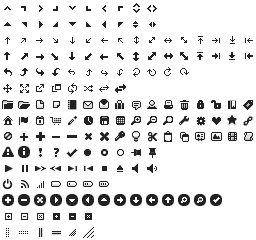
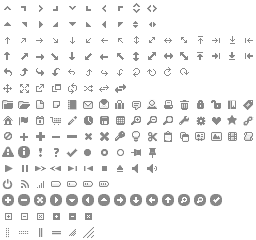
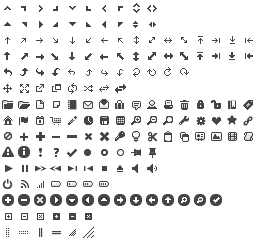
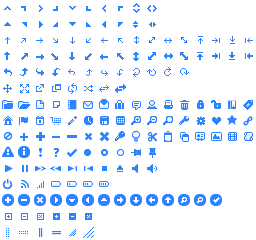
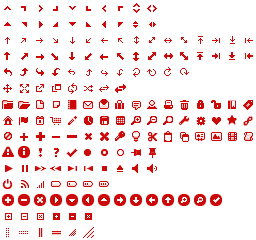
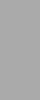
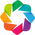
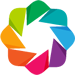
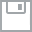
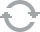
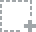
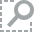
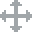
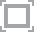
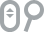

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

import pygridgen as pgg
import pygridtools as pgt

import seaborn
seaborn.set(style='ticks')

%matplotlib nbagg

## Load and plot the boundary data

In [2]:
csvfile = "basic_data/boundary.csv"
!cat {csvfile}

x,y,beta
6,1,1
2,11,0
2,23,1
10,23,1
13,17,0
10,10,-1
18,10,1
18,8,1
15,8,-1
15,2,1
13,2,1
13,8,-1
10,8,-1
10,1,1
6,1,0


<IPython.core.display.Javascript object>


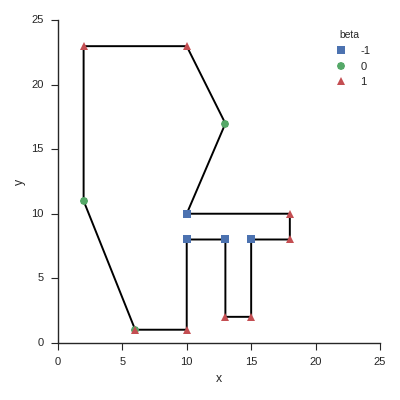

In [3]:
boundary = pandas.read_csv(csvfile)
boundary['reach'] = 'My Reach'
fg = pgt.viz.plotReachDF(boundary, 'x', 'y', 'reach')
fg.set(xlim=(0, 25), ylim=(0, 25), aspect=True)

## Generate a grid with `pygridgen`, plot it with `pygridtools`

<IPython.core.display.Javascript object>


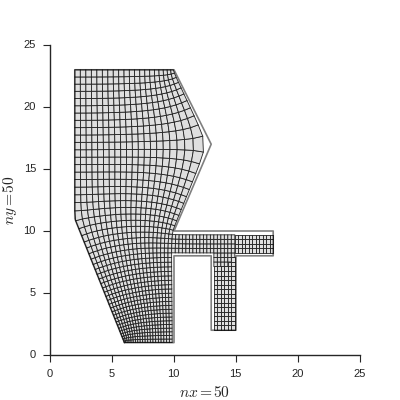

In [4]:
grid = pgg.Gridgen(boundary.x, boundary.y, boundary.beta, shape=(50,50), ul_idx=2)
fig, ax = plt.subplots(figsize=(5, 5))
fig, ax = pgt.viz.plotPygridgen(grid, ax=ax)
ax.set_xlim([0, 25])
ax.set_ylim([0, 25])
ax.set_aspect('equal')
seaborn.despine(ax=ax)

## Now add focus the side channels, and coarsen the upper portion

<IPython.core.display.Javascript object>


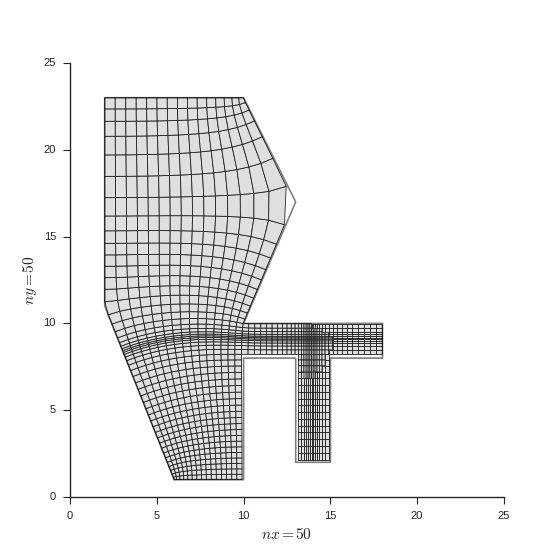

In [5]:
focus = pgg.Focus()

focus.add_focus_y(0.90, factor=0.5, Ry=0.05)
focus.add_focus_y(0.50, factor=5, Ry=0.1)
focus.add_focus_x(0.65, factor=4, Rx=0.2)
grid.focus = focus
grid.generate_grid()

fig, ax = plt.subplots(figsize=(7, 7))
fig, ax = pgt.viz.plotPygridgen(grid, ax=ax)
ax.set_xlim([0, 25])
ax.set_ylim([0, 25])
ax.set_aspect('equal')
seaborn.despine(ax=ax)